# <div align = 'center'>**Polynomial Regression**</div>

---

### **1. What is Polynomial Regression?**
Polynomial Regression is a type of regression analysis where the relationship between the **independent variable** (input) and the **dependent variable** (output) is modeled as an **nth-degree polynomial function**. It is an extension of Linear Regression that allows for modeling **non-linear relationships**.

The mathematical formula for Polynomial Regression is:

$$

   y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \epsilon

$$

Where:
- $ y $: Dependent variable (target).
- $ x $: Independent variable (feature).
- $ \beta_0, \beta_1, \dots, \beta_n $: Coefficients of the polynomial terms.
- $ n $: Degree of the polynomial.
- $ \epsilon $: Error term (residual).

---

### **2. Why Use Polynomial Regression?**

#### **2.1 Limitations of Linear Regression**
- Linear Regression assumes a **straight-line relationship** between the dependent variable ($y $)and the independent variable ($x $).
- It cannot accurately model **curved relationships** in the data.
- Avoids the bias error that occurs when using Linear Regression for non-linear trends.

   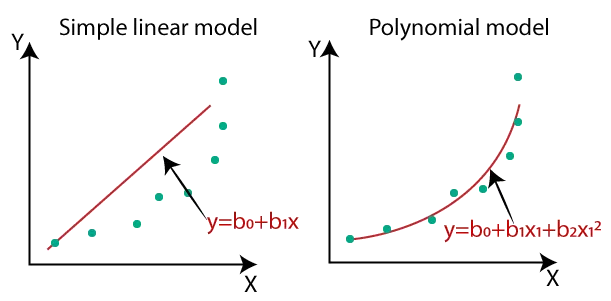

---

### **3. Applications of Polynomial Regression**
1. **Predicting Growth Trends**:
   - Modeling population growth, economic trends, or sales growth.
2. **Physics and Engineering**:
   - Modeling non-linear relationships in physical systems (e.g., projectile motion, heat transfer).
3. **Healthcare**:
   - Modeling the progression of diseases or drug response curves.
4. **Finance**:
   - Predicting stock prices or market trends.

---

### **4. Advantages**
1. **Flexibility**:
   - Can model a wide range of relationships by adjusting the degree of the polynomial.
2. **Improved Fit**:
   - Provides a better fit for non-linear data compared to Linear Regression.

---

### **5. Disadvantages**
1. **Overfitting**:
   - Using a high-degree polynomial can lead to overfitting, where the model fits the training data too closely but performs poorly on new data.
2. **Complexity**:
   - Higher-degree polynomials increase the complexity of the model, making it harder to interpret.
3. **Extrapolation Issues**:
   - Polynomial models can behave unpredictably outside the range of the training data.

---

### **6. Python Implementation**


In [1]:
# Import necessary libraries
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Load and Explore the Dataset

In [2]:
# Load the California Housing Dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

# Convert to a DataFrame for better visualization
df = pd.concat([data, target.rename("PRICE")], axis=1)

# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Feature Selection and Data Splitting

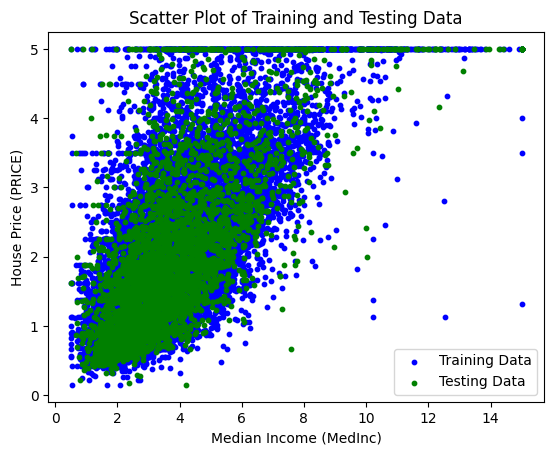

In [3]:
# Select a single feature (Median Income) and the target (House Price)
X = df[['MedInc']]  # Independent variable
y = df['PRICE']     # Dependent variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.scatter(x_train, y_train, color='blue', label='Training Data', s=10)
plt.scatter(x_test, y_test, color='green', label='Testing Data', s=10)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("House Price (PRICE)")
plt.title("Scatter Plot of Training and Testing Data")
plt.legend()
plt.show()

#### Polynomial Regression Model

Fit a Polynomial Regresssion model to the data

In [4]:
# Create polynomial features (degree=2 for simplicity)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train a Linear Regression model on the polynomial features
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# Make predictions
y_train_pred = lr.predict(x_train_poly)
y_test_pred = lr.predict(x_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Training MSE: 0.69
Testing MSE: 0.70
R-squared Score: 0.46


#### Visualize the Polynomial Regression Model

Plot the polynomial regression curve along with the training and testing data.

/home/anupmuttha/Desktop/AAI/AI Labs/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


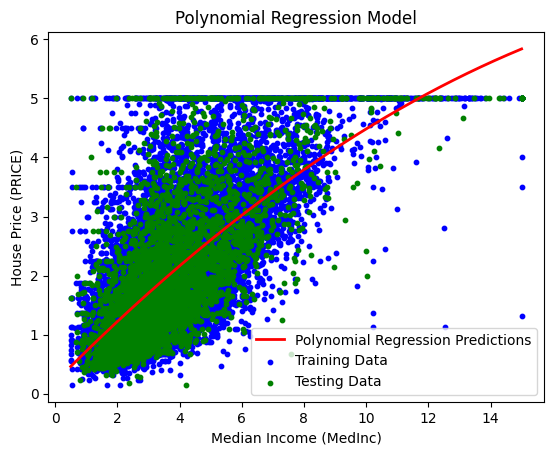

In [5]:
# Generate predictions for a smooth curve
X_new = np.linspace(X.min(), X.max(), 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# Plot the polynomial regression curve
plt.plot(X_new, y_new, "r-", linewidth=2, label="Polynomial Regression Predictions")
plt.scatter(x_train, y_train, color='blue', label='Training Data', s=10)
plt.scatter(x_test, y_test, color='green', label='Testing Data', s=10)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("House Price (PRICE)")
plt.title("Polynomial Regression Model")
plt.legend()
plt.show()

---

### **7. Results and Observations**

1. **Training and Testing MSE**:
   - The Mean Squared Error (MSE) indicates how well the model fits the data. A lower MSE is better.

2. **R-squared Score**:
   - The R-squared score measures how much of the variance in the target variable is explained by the model. A value closer to 1 indicates a better fit.

3. **Visualization**:
   - The red curve represents the polynomial regression model's predictions.
   - The blue and green points represent the training and testing data, respectively.

---